<h1>House Price Prediction</h1>

In [66]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [67]:
data = pd.read_csv('data/Mumbai1.csv')
data.head()

,Unnamed: 0,Price,Area,Location,No. of Bedrooms,New/Resale,Gymnasium,Lift Available,Car Parking,Maintenance Staff,24x7 Security,Children's Play Area,Clubhouse,Intercom,Landscaped Gardens,Indoor Games,Gas Connection,Jogging Track,Swimming Pool
0,0,4850000,720,Kharghar,1,0,0,1,1,1,1,0,0,0,0,0,0,0,0
1,1,4500000,600,Kharghar,1,0,1,1,1,1,1,0,1,0,0,0,0,1,1
2,2,6700000,650,Kharghar,1,0,1,1,1,1,1,1,1,1,0,0,0,1,1
3,3,4500000,650,Kharghar,1,0,0,1,1,1,1,0,0,1,1,0,0,0,0
4,4,5000000,665,Kharghar,1,0,0,1,1,1,1,0,0,1,1,0,0,0,0


In [68]:
data.shape

(6347, 19)

In [69]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6347 entries, 0 to 6346
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Unnamed: 0            6347 non-null   int64 
 1   Price                 6347 non-null   int64 
 2   Area                  6347 non-null   int64 
 3   Location              6347 non-null   object
 4   No. of Bedrooms       6347 non-null   int64 
 5   New/Resale            6347 non-null   int64 
 6   Gymnasium             6347 non-null   int64 
 7   Lift Available        6347 non-null   int64 
 8   Car Parking           6347 non-null   int64 
 9   Maintenance Staff     6347 non-null   int64 
 10  24x7 Security         6347 non-null   int64 
 11  Children's Play Area  6347 non-null   int64 
 12  Clubhouse             6347 non-null   int64 
 13  Intercom              6347 non-null   int64 
 14  Landscaped Gardens    6347 non-null   int64 
 15  Indoor Games          6347 non-null   

In [70]:
data['Location'].unique()

array(['Kharghar', 'Sector-13 Kharghar', 'Sector 18 Kharghar',
       'Sector 20 Kharghar', 'Sector 15 Kharghar', 'Dombivali',
       'Churchgate', 'Prabhadevi', 'Jogeshwari West', 'Kalyan East',
       'Malad East', 'Virar East', 'Virar', 'Malad West', 'Borivali East',
       'Mira Road East', 'Goregaon West', 'Kandivali West',
       'Borivali West', 'Kandivali East', 'Andheri East', 'Goregaon East',
       'Wadala', 'Ulwe', 'Dahisar', 'kandivali', 'Goregaon',
       'Bhandup West', 'thakur village kandivali east', 'Santacruz West',
       'Kanjurmarg', 'I C Colony', 'Dahisar W', 'Marol', 'Parel',
       'Lower Parel', 'Worli', 'Jogeshwari East', 'Chembur Shell Colony',
       'Central Avenue', 'Chembur East', 'Diamond Market Road', 'Mulund',
       'Nalasopara West', 'raheja vihar', 'Powai Lake', 'MHADA Colony 20',
       'Tolaram Colony', 'Taloja', 'Thane West', 'Vangani',
       'Sector 5 Ulwe', 'Sector12 New Panvel', 'Sector 17 Ulwe',
       'Sector9 Kamothe', 'Sector 19 Kharghar

In [71]:
data.nunique()


Unnamed: 0              6347
Price                    979
Area                    1140
Location                 413
No. of Bedrooms            7
New/Resale                 2
Gymnasium                  2
Lift Available             2
Car Parking                2
Maintenance Staff          2
24x7 Security              2
Children's Play Area       2
Clubhouse                  2
Intercom                   2
Landscaped Gardens         2
Indoor Games               2
Gas Connection             2
Jogging Track              2
Swimming Pool              2
dtype: int64

In [72]:
data.duplicated().sum()


0

In [73]:
data.isnull().sum()

Unnamed: 0              0
Price                   0
Area                    0
Location                0
No. of Bedrooms         0
New/Resale              0
Gymnasium               0
Lift Available          0
Car Parking             0
Maintenance Staff       0
24x7 Security           0
Children's Play Area    0
Clubhouse               0
Intercom                0
Landscaped Gardens      0
Indoor Games            0
Gas Connection          0
Jogging Track           0
Swimming Pool           0
dtype: int64

In [74]:
data.describe()

,Unnamed: 0,Price,Area,No. of Bedrooms,New/Resale,Gymnasium,Lift Available,Car Parking,Maintenance Staff,24x7 Security,Children's Play Area,Clubhouse,Intercom,Landscaped Gardens,Indoor Games,Gas Connection,Jogging Track,Swimming Pool
count,6347.000000,6.347000e+03,6347.000000,6347.000000,6347.000000,6347.000000,6347.000000,6347.000000,6347.000000,6347.000000,6347.000000,6347.000000,6347.000000,6347.000000,6347.000000,6347.000000,6347.000000,6347.000000
mean,3173.000000,1.515401e+07,1004.327084,1.910036,0.341736,0.581377,0.801481,0.562943,0.281393,0.562943,0.559319,0.496297,0.484796,0.360643,0.219631,0.243107,0.381440,0.458327
std,1832.365411,2.015943e+07,556.375703,0.863304,0.474329,0.493372,0.398916,0.496061,0.449714,0.496061,0.496508,0.500026,0.499808,0.480225,0.414029,0.428993,0.485778,0.498300
min,0.000000,2.000000e+06,200.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1586.500000,5.300000e+06,650.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3173.000000,9.500000e+06,905.000000,2.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,4759.500000,1.750000e+07,1182.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,6346.000000,4.200000e+08,8511.000000,7.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [75]:
data.dropna()
data.shape

(6347, 19)

In [76]:
numeric_features= [feature for feature in data.columns if data[feature].dtype!= 'O']
categorical_features= [feature for feature in data.columns if data[feature].dtype== 'O']

print("We have {} numerical features: {}".format(len(numeric_features),numeric_features))
print("\nWe have {} categorical features: {}".format(len(categorical_features),categorical_features))

We have 18 numerical features: ['Unnamed: 0', 'Price', 'Area', 'No. of Bedrooms', 'New/Resale', 'Gymnasium', 'Lift Available', 'Car Parking', 'Maintenance Staff', '24x7 Security', "Children's Play Area", 'Clubhouse', 'Intercom', 'Landscaped Gardens', 'Indoor Games', 'Gas Connection', 'Jogging Track', 'Swimming Pool']

We have 1 categorical features: ['Location']


In [77]:
data['Price/sqft'] = data['Price'] / data['Area']
data.head()

,Unnamed: 0,Price,Area,Location,No. of Bedrooms,New/Resale,Gymnasium,Lift Available,Car Parking,Maintenance Staff,24x7 Security,Children's Play Area,Clubhouse,Intercom,Landscaped Gardens,Indoor Games,Gas Connection,Jogging Track,Swimming Pool,Price/sqft
0,0,4850000,720,Kharghar,1,0,0,1,1,1,1,0,0,0,0,0,0,0,0,6736.111111
1,1,4500000,600,Kharghar,1,0,1,1,1,1,1,0,1,0,0,0,0,1,1,7500.000000
2,2,6700000,650,Kharghar,1,0,1,1,1,1,1,1,1,1,0,0,0,1,1,10307.692308
3,3,4500000,650,Kharghar,1,0,0,1,1,1,1,0,0,1,1,0,0,0,0,6923.076923
4,4,5000000,665,Kharghar,1,0,0,1,1,1,1,0,0,1,1,0,0,0,0,7518.796992


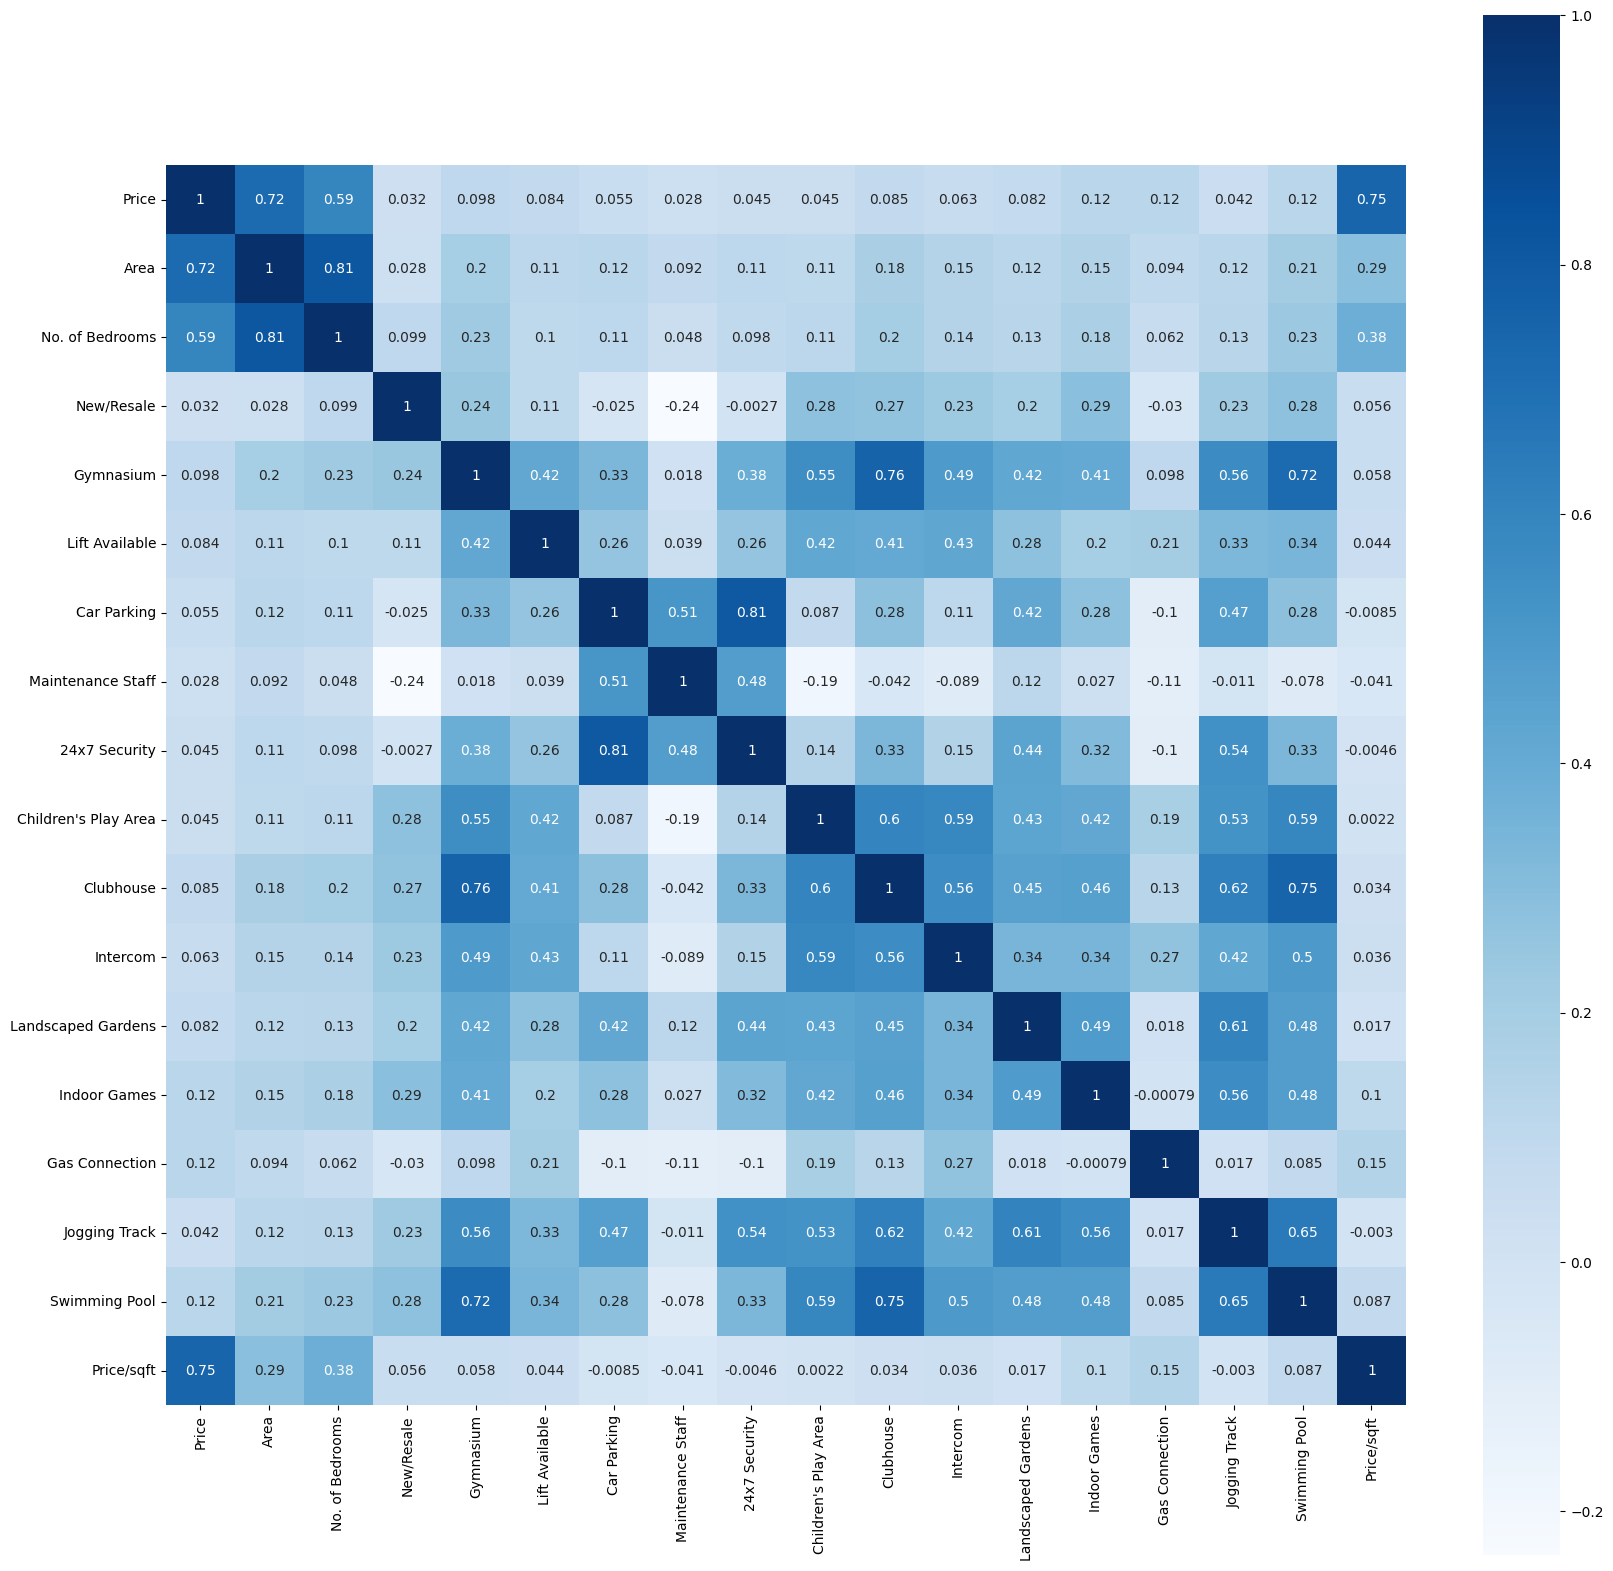

In [78]:
plt.figure(figsize=(20,20))
df=data.drop(['Location','Unnamed: 0'],axis=1)
df_corr=df.corr()
sns.heatmap(df_corr,square=True,cbar=True,annot=True,cmap='Blues')
plt.show()

In [79]:
df=df.drop(["Children's Play Area",'Gas Connection','Jogging Track','Intercom','Clubhouse','Indoor Games','Maintenance Staff', 'Clubhouse',
             '24x7 Security','Landscaped Gardens',],axis=1)
df.shape

(6347, 9)

In [80]:
from scipy import stats

print("1)Mean: " , data['Area'].mean())
print("2)Trimmed mean of 70% data: " , stats.trim_mean(data['Area'], 0.15))
print("3)Median: " ,data['Area'].median())
print("4)Mode: ",data['Area'].mode())
print("5)Standard Deviation: ",data['Area'].std())
print("6)Variance: ",data['Area'].var())

1)Mean:  1004.3270836615724
2)Trimmed mean of 70% data:  909.2205716857978
3)Median:  905.0
4)Mode:  0    650
Name: Area, dtype: int64
5)Standard Deviation:  556.3757030456485
6)Variance:  309553.92293953965


<h4>Model Building</h4>

In [81]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score, mean_absolute_error
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.model_selection import RandomizedSearchCV
from catboost import CatBoostRegressor
from xgboost import XGBRegressor

In [82]:
X = df.drop(['Price'],axis=1)
Y = df['Price']


In [83]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=10)

In [87]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

num_features = X.select_dtypes(exclude="object").columns
cat_features = X.select_dtypes(include="object").columns

numeric_transformer = StandardScaler()
oh_transformer = OneHotEncoder()

preprocessor  = ColumnTransformer(
    [
        ("OneHotEncoder", oh_transformer, cat_features),
        ("StandardScaler", numeric_transformer, num_features),
    ]
)

In [92]:
X = preprocessor.fit_transform(X)

ValueError: Specifying the columns using strings is only supported for pandas DataFrames

In [93]:
X.shape

(6347, 8)

In [97]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=10)
X_train.shape, X_test.shape

((5077, 8), (1270, 8))

<h4>Regression</h4>

In [98]:
def evaluate_model(true,predicted):
    mae=mean_absolute_error(true,predicted)
    mse=mean_squared_error(true,predicted)
    rmse = np.sqrt(mse)
    r2_sqaure = r2_score(true,predicted)
    return mae, rmse, r2_sqaure
    

In [99]:
models = {
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "K Nearest Neighbours": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor(),
    "XGBRegressor": XGBRegressor(),
    "CatBoost Regressor": CatBoostRegressor(),
    "AdaBoost Regressor": AdaBoostRegressor()
}
model_list = []
r2_list = []

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, Y_train)

    y_train_pred= model.predict(X_train)
    y_test_pred= model.predict(X_test)

    model_train_mae, model_train_rmse, model_train_r2 = evaluate_model(Y_train,y_train_pred)
    model_test_mae, model_test_rmse, model_test_r2 = evaluate_model(Y_test,y_test_pred)

    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])

    print("Model performance for Training set")
    print(" - Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print(" - Mean Absolute Error: {:.4f}".format(model_train_mae))
    print(" - R2 Score: {:.4f}".format(model_train_r2))

    print("----------------------------------------")

    print("Model performance for Testing set")
    print(" - Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print(" - Mean Absolute Error: {:.4f}".format(model_test_mae))
    print(" - R2 Score: {:.4f}".format(model_test_r2))
    r2_list.append(model_test_r2)

    print('='*25)
    print('\n')

Linear Regression
Model performance for Training set
 - Root Mean Squared Error: 7718111.6465
 - Mean Absolute Error: 4001052.6339
 - R2 Score: 0.8519
----------------------------------------
Model performance for Testing set
 - Root Mean Squared Error: 6738075.2947
 - Mean Absolute Error: 3918732.8451
 - R2 Score: 0.8926


Lasso
Model performance for Training set
 - Root Mean Squared Error: 7718111.6465
 - Mean Absolute Error: 4001051.7660
 - R2 Score: 0.8519
----------------------------------------
Model performance for Testing set
 - Root Mean Squared Error: 6738075.4557
 - Mean Absolute Error: 3918732.1839
 - R2 Score: 0.8926


Ridge
Model performance for Training set
 - Root Mean Squared Error: 7718115.1357
 - Mean Absolute Error: 3999235.1599
 - R2 Score: 0.8519
----------------------------------------
Model performance for Testing set
 - Root Mean Squared Error: 6738381.1233
 - Mean Absolute Error: 3917156.5299
 - R2 Score: 0.8926


K Nearest Neighbours
Model performance for Tra

In [117]:
pd.DataFrame(list(zip(model_list,r2_list)),columns=['Model Name', 'R2 Score'])

,Model Name,R2 Score
0,Linear Regression,0.892586
1,Lasso,0.892586
2,Ridge,0.892576
3,K Nearest Neighbours,0.926610
4,Decision Tree,0.895442
5,Random Forest,0.965908
6,XGBRegressor,0.899637
7,CatBoost Regressor,0.919157
8,AdaBoost Regressor,0.659674


<h5>Linear Regression</h5>

In [119]:
lin_model = LinearRegression(fit_intercept=True)
lin_model = lin_model.fit(X_train,Y_train)
y_pred = lin_model.predict(X_test)
score = r2_score(y_pred, Y_test)*100
print("Linear Regression Accuracy: %.2f" %score)

Linear Regression Accuracy: 87.88


Text(0, 0.5, 'Predicted')

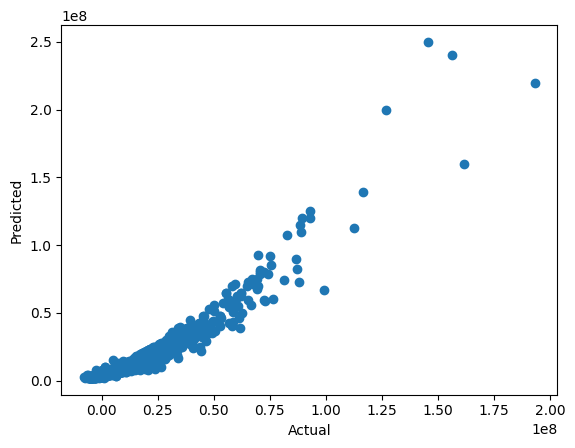

In [120]:
plt.scatter(y_pred, Y_test)
plt.xlabel('Actual')
plt.ylabel('Predicted')

<Axes: xlabel='Price'>

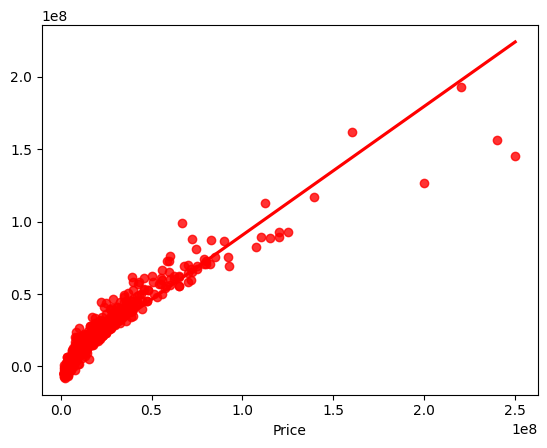

In [122]:
sns.regplot(x=Y_test, y=y_pred, ci=None, color='red')